Sample Size Calculation Report

Confidence Level: 95%
Effect Size (Cohen's d): 0.5
Minimum Sample Size Needed (Statistical Power 0.8): 50
Test Type: One-sided




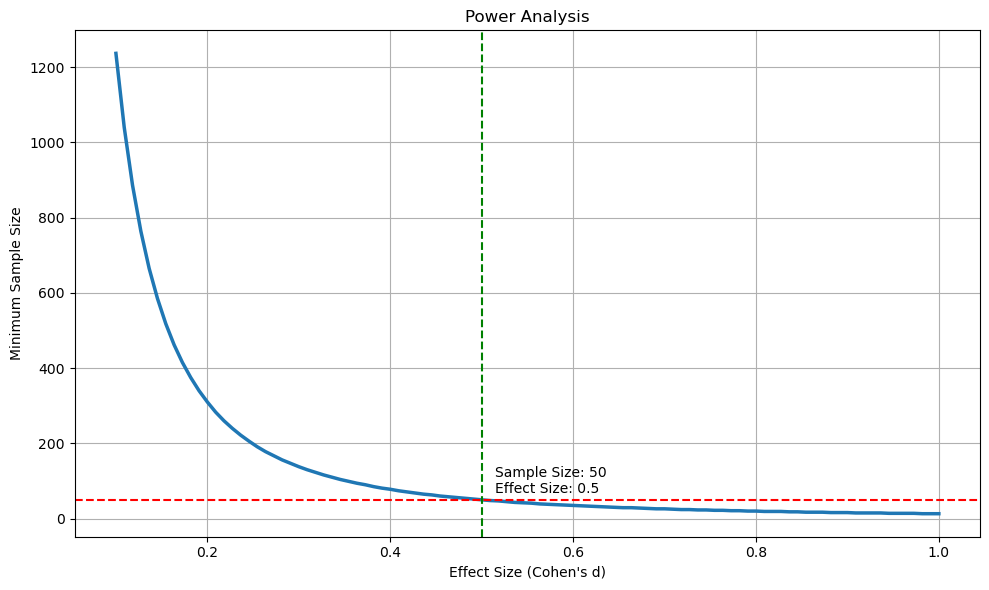

Sample Size Calculation Report

Confidence Level: 95%
Effect Size (Cohen's d): 0.5
Minimum Sample Size Needed (Statistical Power 0.8): 50
Test Type: One-sided




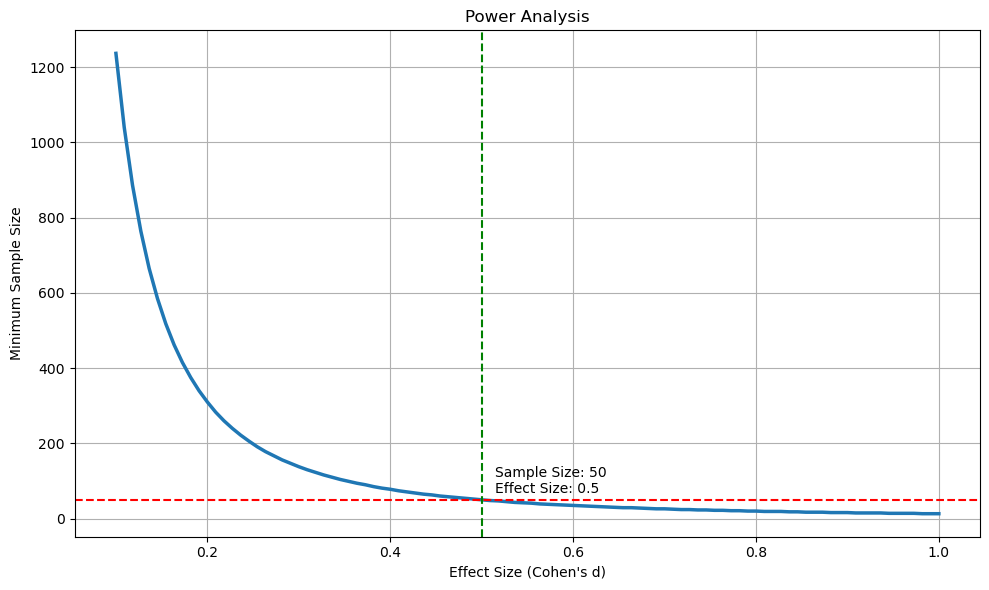

Sample Size Calculation Report

Confidence Level: 95%
Effect Size (Cohen's d): 0.5
Minimum Sample Size Needed (Statistical Power 0.8): 50
Test Type: One-sided




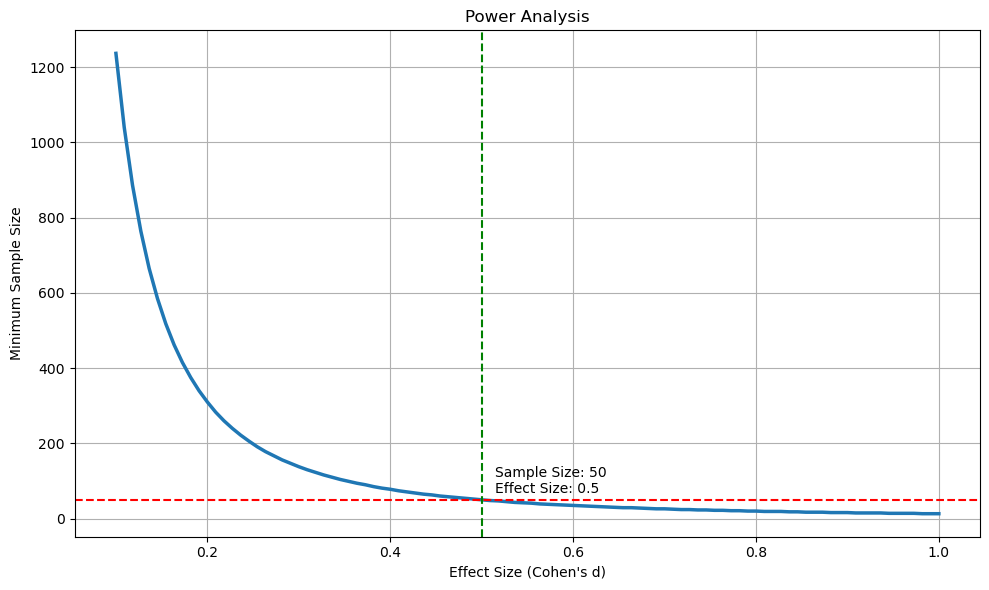

Sample Size Calculation Report

Confidence Level: 95%
Effect Size (Cohen's d): 0.5
Minimum Sample Size Needed (Statistical Power 0.8): 50
Test Type: One-sided




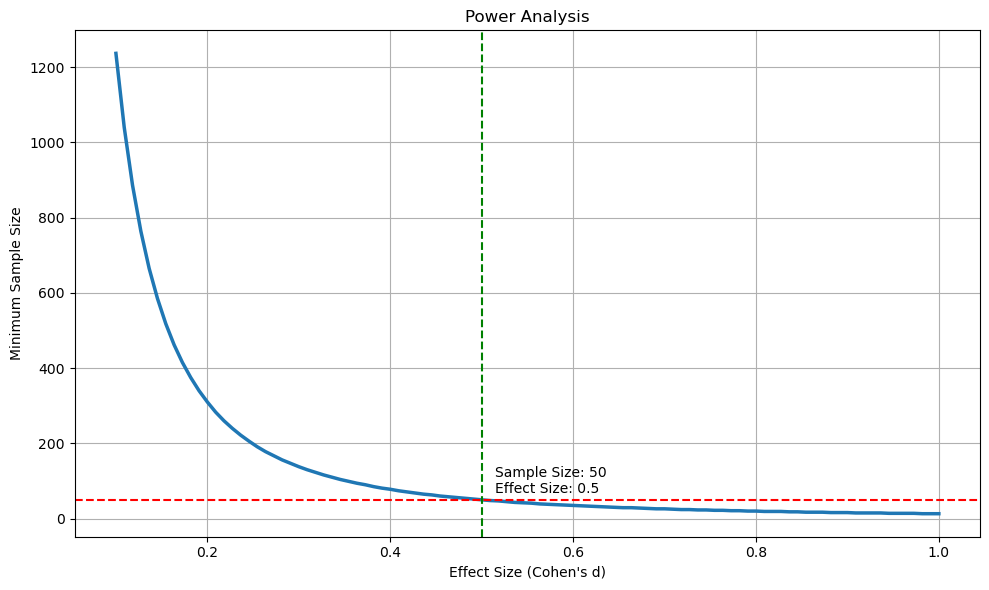

Sample Size Calculation Report

Confidence Level: 95%
Effect Size (Cohen's d): 0.5
Minimum Sample Size Needed (Statistical Power 0.8): 63
Test Type: Two-sided




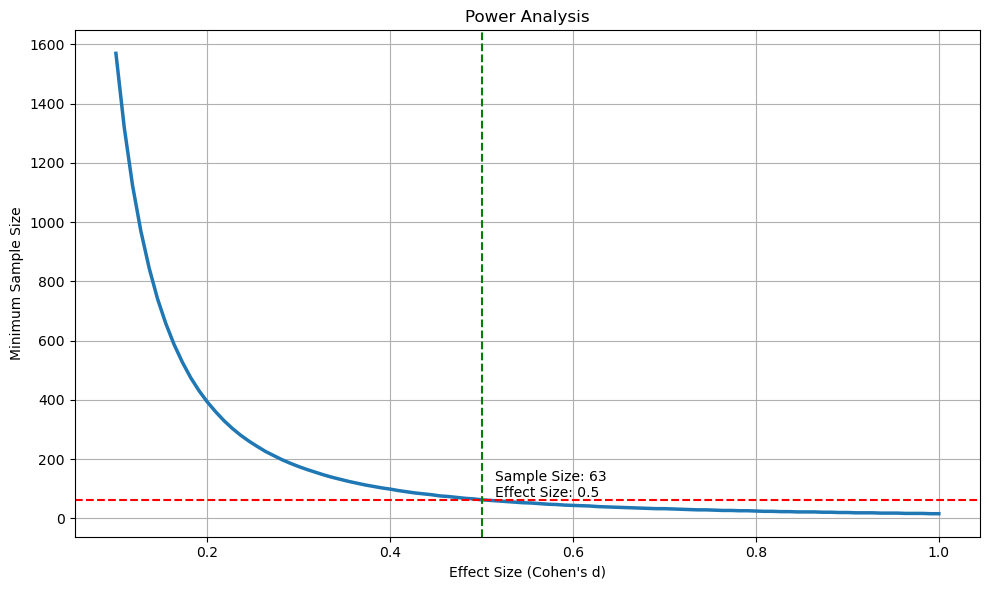

In [1]:
import tkinter as tk
from tkinter import ttk
import math
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt
import numpy as np

def calculate_sample_size(confidence_level, effect_size, power, test_type):
    # Convert confidence level to alpha level
    alpha_levels = {
        "80%": 0.2,
        "85%": 0.15,
        "90%": 0.1,
        "95%": 0.05,
        "99%": 0.01
    }
    alpha = alpha_levels.get(confidence_level, None)

    if alpha is None:
        print(f"Confidence level '{confidence_level}' not supported.")
        return None

    # Calculate minimum sample size for desired statistical power using statsmodels
    if test_type == 'One-sided':
        min_sample_size = smp.NormalIndPower().solve_power(
            effect_size=effect_size, nobs1=None, alpha=alpha, power=power, alternative='larger'
        )
    elif test_type == 'Two-sided':
        min_sample_size = smp.NormalIndPower().solve_power(
            effect_size=effect_size, nobs1=None, alpha=alpha, power=power, alternative='two-sided'
        )
    else:
        print(f"Invalid test type: {test_type}")
        return None

    return math.ceil(min_sample_size)


def generate_report(confidence_level, effect_size, min_sample_size, power, test_type):
    report = f"Sample Size Calculation Report\n\n"
    report += f"Confidence Level: {confidence_level}\n"
    report += f"Effect Size (Cohen's d): {effect_size}\n"
    report += f"Minimum Sample Size Needed (Statistical Power {power}): {min_sample_size}\n"
    report += f"Test Type: {test_type}\n\n"
    print(report)


def calculate_button_clicked():
    try:
        confidence_level = confidence_combobox.get()
        effect_size = float(effect_size_entry.get())
        power = float(power_entry.get())
        test_type = test_combobox.get()

        min_sample_size = calculate_sample_size(confidence_level, effect_size, power, test_type)
        generate_report(confidence_level, effect_size, min_sample_size, power, test_type)

        effect_sizes = np.linspace(0.1, 1, 100)
        sample_sizes = [calculate_sample_size(confidence_level, es, power, test_type) for es in effect_sizes]

        plt.figure(figsize=(10, 6))
        
        # Power Analysis Plot
        plt.plot(effect_sizes, sample_sizes, linewidth=2.5)
        plt.title('Power Analysis')
        plt.xlabel("Effect Size (Cohen's d)")
        plt.ylabel('Minimum Sample Size')
        plt.grid(True)

        user_effect_size = float(effect_size_entry.get())
        user_sample_size = sample_sizes[np.argmin(np.abs(effect_sizes - user_effect_size))]  # Use np.argmin for closest value

       # Calculate label coordinates
        label_x = user_effect_size + 0.015  # Adjust as needed for horizontal position
        label_y = user_sample_size + 50  # Use user_sample_size directly for vertical position

        plt.axvline(x=user_effect_size, color='green', linestyle='--', label='Effect Size')
        plt.axhline(y=user_sample_size, color='red', linestyle='--', label='Sample Size')
        plt.text(label_x, label_y, f'Sample Size: {user_sample_size}\nEffect Size: {effect_size}', va='center', ha='left', color='black')
        
        plt.tight_layout()
        plt.show()

        result_label.config(text="Report printed in terminal")
    except ValueError as e:
        result_label.config(text=f"Error: {e}")

root = tk.Tk()
root.title("Sample Size Calculator")

# Confidence Level dropdown
ttk.Label(root, text="Confidence Level:").pack()
confidence_combobox = ttk.Combobox(root, values=["80%", "85%", "90%", "95%", "99%"])
confidence_combobox.pack()
confidence_combobox.set("95%")  # Default value

# Effect Size entry
ttk.Label(root, text="Effect Size (Cohen's d):").pack()
effect_size_entry = ttk.Entry(root)
effect_size_entry.pack()
effect_size_entry.insert(0, "0.5")  # Default value

# Desired Statistical Power entry
ttk.Label(root, text="Desired Statistical Power:").pack()
power_entry = ttk.Entry(root)
power_entry.pack()
power_entry.insert(0, "0.8")  # Default value

# Test Type dropdown
ttk.Label(root, text="Test Type:").pack()
test_combobox = ttk.Combobox(root, values=["One-sided", "Two-sided"])
test_combobox.pack()
test_combobox.set("One-sided")  # Default value

# Calculate button
calculate_button = ttk.Button(root, text="Calculate Sample Size", command=calculate_button_clicked)
calculate_button.pack()

# Result label
result_label = ttk.Label(root, text="")
result_label.pack()

root.mainloop()
